Here is an example showing the radar coordinates for a cfradial volume scan.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pyart
from pyproj import Proj
from mpl_toolkits.basemap import Basemap
import netCDF4 as nc
import numpy as np, h5py 
import scipy.io
import datetime as dt
import os
os.environ['TZ'] = 'UTC'

In [6]:
def radar2xyz(rg,az,el,h0):
    Rp=(4./3.)*6378137.0
    s=Rp*np.arctan(rg*np.cos(el * np.pi / 180.)/\
                   (Rp+rg*(np.sin(el * np.pi / 180.))))
    x=s*np.sin(az * np.pi / 180.)
    y=s*np.cos(az * np.pi / 180.)
    z=h0+(rg ** 2 + Rp ** 2 + 2.0 * rg * Rp * \
       np.sin(el * np.pi / 180.0)) ** 0.5 - Rp
    return s,x,y,z

In [7]:
flight='20120128_1549_1d_1sec.mat'

ac = scipy.io.loadmat('/Users/snesbitt/data/matlab/gcpex/'+flight)

acdate={}
acdate['year']=flight[0:4]
acdate['month']=flight[4:6]
acdate['day']=flight[6:8]

acdate['basetime']=np.zeros(np.shape(ac['tsec']))
for i in np.arange(np.shape(ac['tsec'])[0]):
    acdate['basetime'][i]=np.float64(np.datetime64(acdate['year']+'-'+acdate['month']+'-'+acdate['day']+'T00:00Z')+\
    np.timedelta64(int(ac['tsec'][i]), 's')) 
    
ac_lat=np.array(ac['MastrLAT'])
ac_lon=np.array(ac['MastrLON'])
ac_altit=np.array(ac['Altit'])


In [8]:
file='cfrad.20120128_174023.381_to_20120128_174210.694_KING_v16_CON_SECT_PPI.nc'
radar = pyart.io.read_cfradial(file)

In [11]:
np.shape(radar.fields['DBZ']['data'])

(1668, 500)

In [13]:
np.shape(radar.elevation['data'])

(1668,)

In [17]:
np.shape(radar.azimuth['data'])

(1668,)

In [14]:
np.shape(radar.range['data'])

(500,)

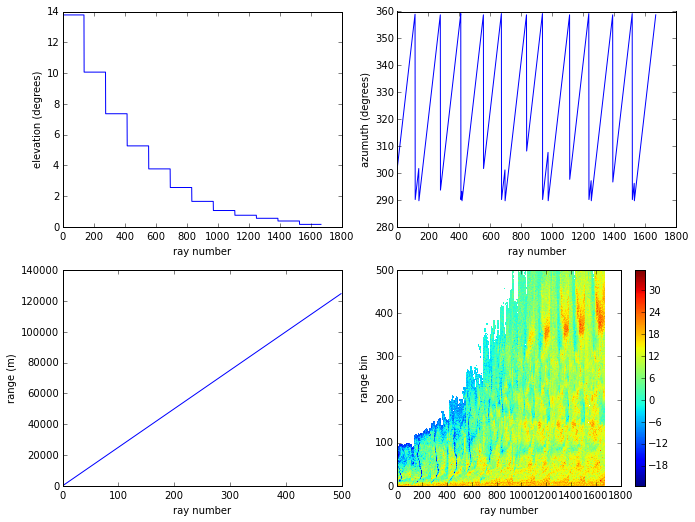

In [20]:
plt.figure(figsize=(11,8.5))
plt.subplot(221)
plt.plot(radar.elevation['data'])
plt.xlabel('ray number')
plt.ylabel('elevation (degrees)')
plt.subplot(222)
plt.plot(radar.azimuth['data'])
plt.xlabel('ray number')
plt.ylabel('azumuth (degrees)')
plt.subplot(223)
plt.plot(radar.range['data'])
plt.xlabel('ray number')
plt.ylabel('range (m)')
plt.subplot(224)
plt.pcolormesh(np.transpose(radar.fields['DBZ']['data'][:]))
plt.ylabel('range bin')
plt.xlabel('ray number')
plt.colorbar()

plt.show()